In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('seaborn-paper')

In [44]:
def param_pendulum(l):
    def pendulum(t, x: np.array):
        return np.array([
            x[1],
            -4*x[1] - 9.81 / l * np.sin(x[0])
        ])
    return pendulum

pendulum_system = param_pendulum(9.81)

In [48]:
time_span = np.arange(0, 100., 0.01)

data = solve_ivp(pendulum_system, (time_span[0], time_span[-1]), np.array([np.pi/3, 0]), t_eval=time_span)


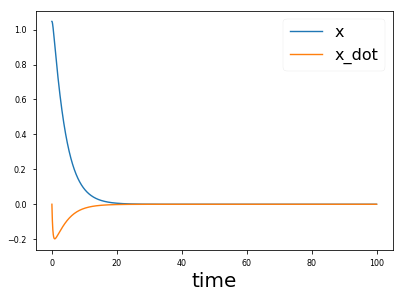

In [49]:
plt.plot(time_span, data.y[0], time_span, data.y[1])
plt.legend(['x', 'x_dot'], fontsize=16)
plt.xlabel('time', fontsize=20)
plt.show()

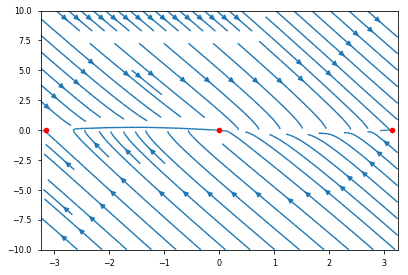

In [50]:
x, y = np.linspace(-np.pi - 0.1, np.pi + 0.1, 1000), np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
U, V = pendulum_system(0, (X, Y))
plt.streamplot(X, Y, U, V)
plt.plot((0, -np.pi, np.pi), np.zeros(3), 'ro')
plt.show()

In [35]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return (line,) 

def update(frame_index):
    x = 2 * np.sin(data.y[0])
    y = -2 * np.cos(data.y[0])
    line.set_data([0, x], [0, y])
    return (line,)

anim = animation.FuncAnimation(fig, update, init_func=init, frames=time_span.size, interval=10, blit=True)

HTML(anim.to_html5_video())

ValueError: setting an array element with a sequence.

ValueError: setting an array element with a sequence.

<Figure size 460x316 with 1 Axes>